In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#spliting data for training


In [ ]:
from sklearn.model_selection import train_test_split

x,y = df.drop('target', axis=1), df['target']

X_train,X_test,Y_train,Y_test=train_test_split(
    x,y,train_size=0.8,random_state=40
    
)

scaling not requried fro this model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state= 10)
forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=10)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)


GradientBoostingClassifier()

sacle Requried

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

c:\Users\harshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train,Y_train)

SVC(probability=True)

In [ ]:
forest.score(X_test,Y_test)


1.0

In [ ]:
gb_clf.score(X_test,Y_test)


0.9609756097560975

In [ ]:
nb_clf.score(X_test,Y_test)
  

0.8195121951219512

In [ ]:
knn.score(X_test,Y_test)
 

0.7463414634146341

In [ ]:
log.score(X_test,Y_test)


0.8195121951219512

In [ ]:
svc.score(X_test,Y_test)


0.697560975609756

#Recall

In [ ]:
from sklearn.metrics import recall_score

y_pred = forest.predict(X_test)
print('forest : ', recall_score(Y_test,y_pred))

y_pred = gb_clf.predict(X_test)
print('gb : ', recall_score(Y_test,y_pred))

y_pred = nb_clf.predict(X_test)
print('nb : ', recall_score(Y_test,y_pred))


forest :  1.0
gb :  0.9607843137254902
nb :  0.8627450980392157


#Recall for Non scalled

In [ ]:
from sklearn.metrics import recall_score

y_pred = log.predict(X_test)
print('log : ', recall_score(Y_test,y_pred))

y_pred = knn.predict(X_test)
print('knn : ', recall_score(Y_test,y_pred))

y_pred = svc.predict(X_test)
print('svc : ', recall_score(Y_test,y_pred))

log :  0.8725490196078431
knn :  0.7745098039215687
svc :  0.9117647058823529


#Visual 

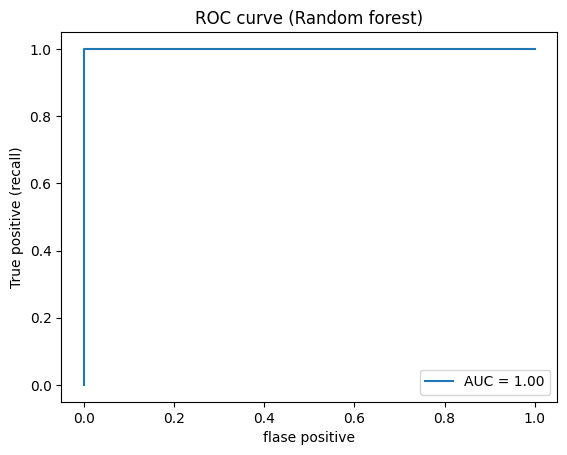

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score ,roc_curve
import numpy as np

y_prob =  forest.predict_proba(X_test)[:,1]

fpr , tpr  ,threshoulds = roc_curve(Y_test, y_prob)

auc_score=roc_auc_score(Y_test,y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel('flase positive')
plt.ylabel('True positive (recall)')
plt.title("ROC curve (Random forest)")
plt.legend()
plt.show()

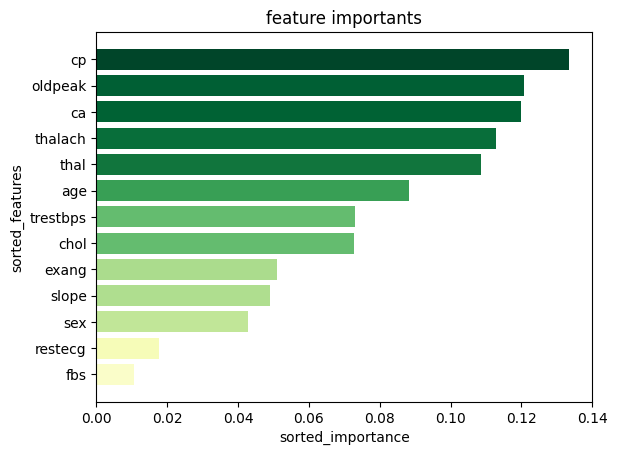

In [ ]:
import numpy as np 

feature_importances = forest.feature_importances_ 

features = forest.feature_names_in_

sort_idx = np.argsort(feature_importances)
sorted_features = features[sort_idx]
sorted_importance = feature_importances[sort_idx]

colors = plt.cm.YlGn(sorted_importance/ max(sorted_importance))

plt.barh(sorted_features, sorted_importance , color = colors)
plt.xlabel('sorted_importance')
plt.ylabel('sorted_features')
plt.title("feature importants")

plt.show()

In [ ]:
import joblib

joblib.dump(forest, "heart_model.pkl")


['heart_model.pkl']